In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [6]:
df = pd.read_csv('results.csv', sep=';')
df.head()

,Name,OriginalSize,BxesSize,BxesPreprocessing,ZipSize,BxesToXesSize,ExiSize
0,CCC19 - Log XES,806604,21815,21254,26474,784932,21653
1,not_existing_assembly_loading_50,69765356,1399082,1370576,3031019,68702597,1496488
2,finalizable_object_1,885275,33793,33490,33805,844702,28344
3,exception_try_catch_finally_when_1,620798,31017,30979,30622,607637,25040
4,unsafe_fixed_50,24518888,415052,404885,1132204,23972809,535439


In [7]:
def test_hypothesis(df: pd.DataFrame):
    x = [x for x in range(len(df['BxesSize'].to_numpy()))]
    
    bxes_line = df['OriginalSize'].to_numpy() / df['BxesSize'].to_numpy()
    bxes_preprocessing = df['OriginalSize'].to_numpy() / df['BxesPreprocessing'].to_numpy()
    exi = df['OriginalSize'].to_numpy() / df['ExiSize'].to_numpy()
    
    plt.plot(x, bxes_preprocessing, label='BxesPreprocessing')
    plt.plot(x, bxes_line, label='Bxes', linestyle='--')
    plt.plot(x, exi, label='Exi', linestyle=':')
    plt.legend()
    plt.show()
    
    plt.plot(x, df['OriginalSize'], label='OriginalSize')
    plt.plot(x, df['BxesToXesSize'], label='BxesToXesSize')
    plt.legend()
    plt.show()

    print(f'Exi-BxesPreprocessing {scipy.stats.ttest_rel(exi, bxes_preprocessing)}')
    print(f'Exi-Bxes {scipy.stats.ttest_rel(exi, bxes_line)}')
    print(f'Bxes-BxesPreprocessing', {scipy.stats.ttest_rel(bxes_line, bxes_preprocessing)})
    print(f'Bxes mean: {np.mean(bxes_line)}')
    print(f'BxesPreprocessing mean: {np.mean(bxes_preprocessing)}')
    print(f'Exi: {np.mean(exi)}')
    

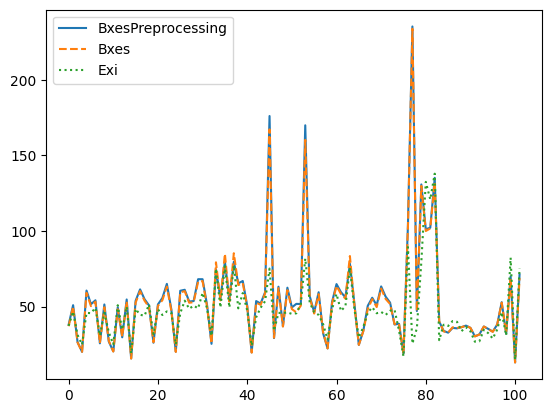

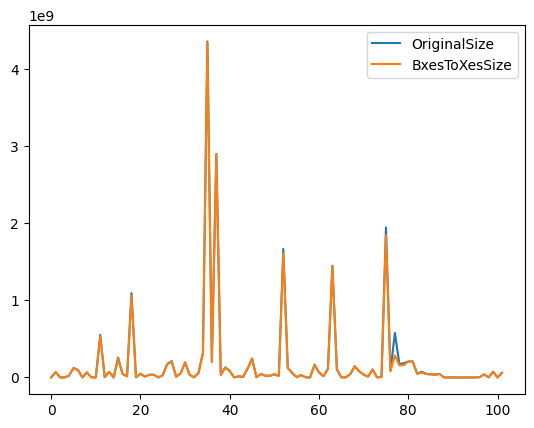

Exi-BxesPreprocessing TtestResult(statistic=-2.7926132251423224, pvalue=0.006254805652805677, df=101)
Exi-Bxes TtestResult(statistic=-2.596364163440163, pvalue=0.01082618740163833, df=101)
Bxes-BxesPreprocessing {TtestResult(statistic=-3.6934244567760683, pvalue=0.00035925895222195905, df=101)}
Bxes mean: 53.7781774467135
BxesPreprocessing mean: 54.46259362049429
Exi: 47.36671226539508


In [8]:
test_hypothesis(df)

In [9]:
def test_hypothesis_filtered_df(df, predicate):
    filter_result = df.apply(predicate, axis=1)
    df = df[filter_result]
    print(df['Name'].unique())
    test_hypothesis(df)

['not_existing_assembly_loading_50' 'finalizable_object_1'
 'exception_try_catch_finally_when_1' 'unsafe_fixed_50' 'array_pooling_75'
 'task_test_project_50' 'dynamic_assembly_loading_1'
 'finalizable_object_75' 'simple_async_await_1' 'console_app_1_1'
 'intensive_thread_pool_25' 'file_async_operations_1'
 'dynamic_assembly_loading_50' 'exception_try_catch_finally_1'
 'not_simple_async_await_75' 'console_app_1_75'
 'exception_try_catch_finally_when_25' 'intensive_thread_pool_50'
 'exception_try_catch_finally_async_1' 'task_test_project_25'
 'unsafe_fixed_25' 'yield_enumerator_75'
 'not_existing_assembly_loading_25' 'unsafe_fixed_1'
 'exception_try_catch_finally_when_50' 'simple_async_await_75'
 'exception_try_catch_finally_async_75' 'exception_try_catch_finally_75'
 'file_write_project_75' 'dynamic_assembly_creation_75'
 'dynamic_assembly_loading_25' 'task_test_project_1' 'loh_allocations_1'
 'file_async_operations_75' 'loh_allocations_75'
 'file_async_operations_50' 'loh_allocations_5

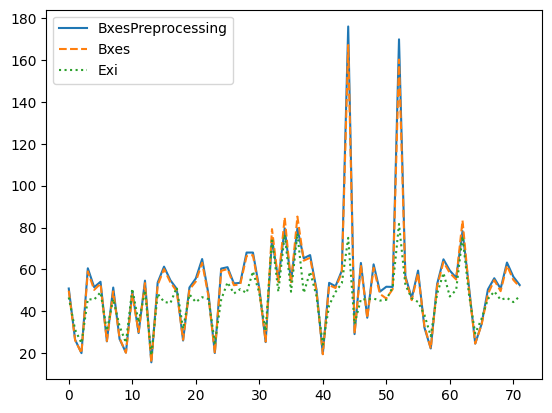

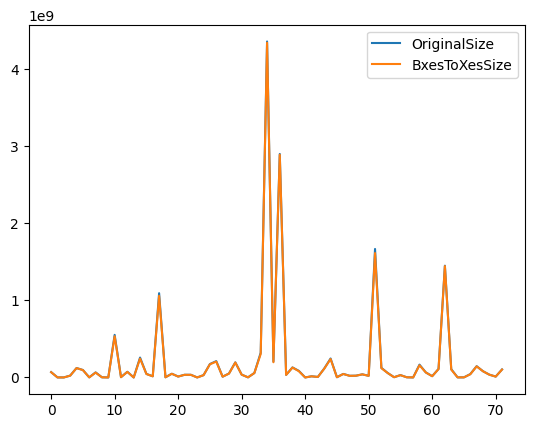

Exi-BxesPreprocessing TtestResult(statistic=-3.4228230086159868, pvalue=0.0010323152890973717, df=71)
Exi-Bxes TtestResult(statistic=-3.307009678012619, pvalue=0.0014818021506429072, df=71)
Bxes-BxesPreprocessing {TtestResult(statistic=-3.1306618139203883, pvalue=0.0025320605191253877, df=71)}
Bxes mean: 52.460559280412376
BxesPreprocessing mean: 53.259338361999916
Exi: 46.57586460417308


In [10]:
def all_procfiler_logs_predicate(row):
    return ('_1' in row['Name'] or '_25' in row['Name'] or '_50' in row['Name'] or '_75' in row['Name']) and 'BPI' not in row['Name']

test_hypothesis_filtered_df(df, all_procfiler_logs_predicate)

['finalizable_object_1' 'exception_try_catch_finally_when_1'
 'dynamic_assembly_loading_1' 'simple_async_await_1' 'console_app_1_1'
 'file_async_operations_1' 'exception_try_catch_finally_1'
 'console_app_1_75' 'exception_try_catch_finally_async_1' 'unsafe_fixed_1'
 'task_test_project_1' 'loh_allocations_1' 'yield_enumerator_1'
 'console_app_1_25' 'not_simple_async_await_1' 'intensive_thread_pool_1'
 'console_app_1_50' 'dynamic_assembly_creation_1' 'file_write_project_1'
 'not_existing_assembly_loading_1' 'array_pooling_1']


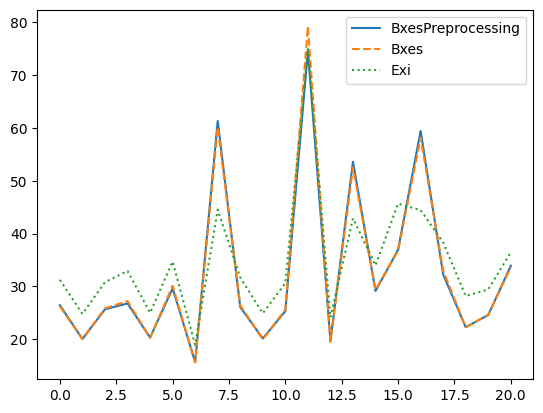

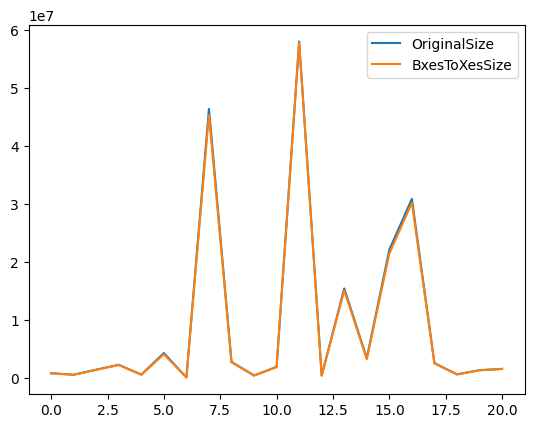

Exi-BxesPreprocessing TtestResult(statistic=1.383646406849049, pvalue=0.18171652620491213, df=20)
Exi-Bxes TtestResult(statistic=1.3596184367183608, pvalue=0.1890832090879712, df=20)
Bxes-BxesPreprocessing {TtestResult(statistic=0.5099076224735004, pvalue=0.6156972437924952, df=20)}
Bxes mean: 32.688862513671694
BxesPreprocessing mean: 32.56082397516668
Exi: 34.69385335785272


In [11]:
def one_repeat_procfiler_logs_predicate(row):
    return ('_1' in row['Name']) and 'BPI' not in row['Name']

test_hypothesis_filtered_df(df, one_repeat_procfiler_logs_predicate)

['intensive_thread_pool_25' 'exception_try_catch_finally_when_25'
 'task_test_project_25' 'unsafe_fixed_25'
 'not_existing_assembly_loading_25' 'dynamic_assembly_loading_25'
 'not_simple_async_await_25' 'console_app_1_25' 'array_pooling_25'
 'finalizable_object_25' 'exception_try_catch_finally_async_25'
 'simple_async_await_25' 'exception_try_catch_finally_25'
 'dynamic_assembly_creation_25' 'file_write_project_25'
 'loh_allocations_25' 'file_async_operations_25' 'yield_enumerator_25']


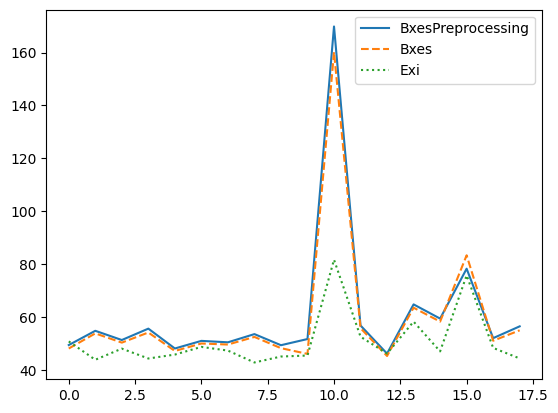

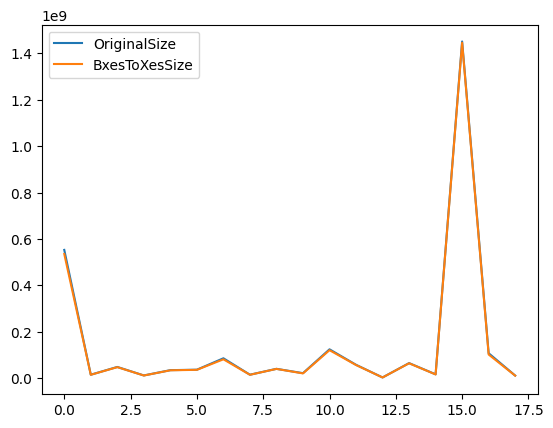

Exi-BxesPreprocessing TtestResult(statistic=-2.1609050812299206, pvalue=0.045265649696519625, df=17)
Exi-Bxes TtestResult(statistic=-2.0493657012832736, pvalue=0.05618325887138477, df=17)
Bxes-BxesPreprocessing {TtestResult(statistic=-2.278013142265516, pvalue=0.035927501156303915, df=17)}
Bxes mean: 59.62946821576848
BxesPreprocessing mean: 61.111345725799
Exi: 50.96406131018077


In [12]:
def one_repeat_procfiler_logs_predicate(row):
    return ('_25' in row['Name']) and 'BPI' not in row['Name']

test_hypothesis_filtered_df(df, one_repeat_procfiler_logs_predicate)

['not_existing_assembly_loading_50' 'unsafe_fixed_50'
 'task_test_project_50' 'dynamic_assembly_loading_50'
 'intensive_thread_pool_50' 'exception_try_catch_finally_when_50'
 'file_async_operations_50' 'loh_allocations_50' 'file_write_project_50'
 'dynamic_assembly_creation_50' 'exception_try_catch_finally_50'
 'simple_async_await_50' 'exception_try_catch_finally_async_50'
 'yield_enumerator_50' 'console_app_1_50' 'not_simple_async_await_50'
 'finalizable_object_50' 'array_pooling_50']


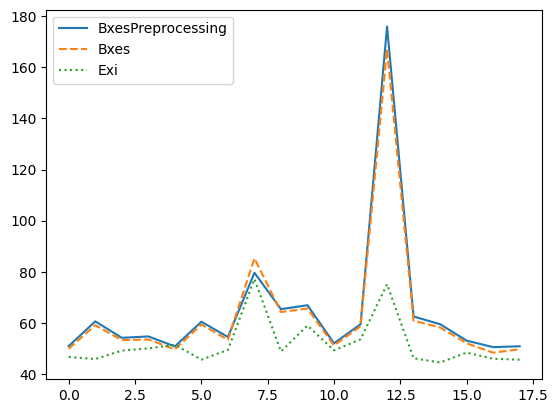

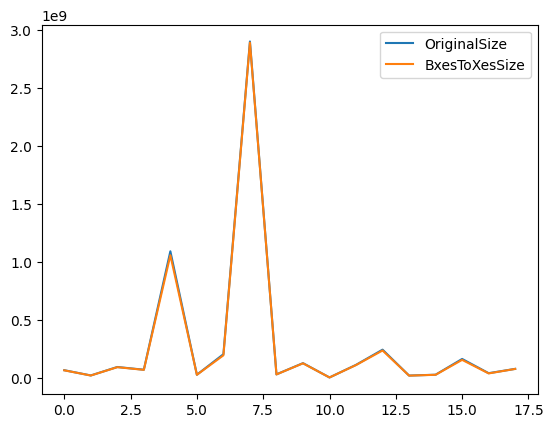

Exi-BxesPreprocessing TtestResult(statistic=-2.399244824477498, pvalue=0.028169480665971185, df=17)
Exi-Bxes TtestResult(statistic=-2.3621457527773884, pvalue=0.03035911027262068, df=17)
Bxes-BxesPreprocessing {TtestResult(statistic=-2.1141599543756118, pvalue=0.04958046463590746, df=17)}
Bxes mean: 63.25575656327651
BxesPreprocessing mean: 64.5060539254327
Exi: 51.70467570788716


In [13]:
def one_repeat_procfiler_logs_predicate(row):
    return ('_50' in row['Name']) and 'BPI' not in row['Name']

test_hypothesis_filtered_df(df, one_repeat_procfiler_logs_predicate)

['array_pooling_75' 'finalizable_object_75' 'not_simple_async_await_75'
 'console_app_1_75' 'yield_enumerator_75' 'simple_async_await_75'
 'exception_try_catch_finally_async_75' 'exception_try_catch_finally_75'
 'file_write_project_75' 'dynamic_assembly_creation_75'
 'file_async_operations_75' 'loh_allocations_75'
 'exception_try_catch_finally_when_75' 'intensive_thread_pool_75'
 'dynamic_assembly_loading_75' 'task_test_project_75' 'unsafe_fixed_75'
 'not_existing_assembly_loading_75']


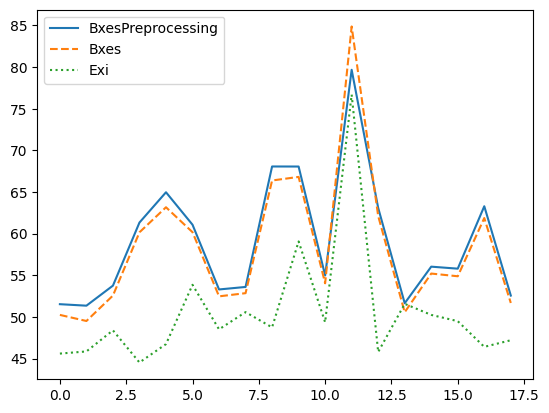

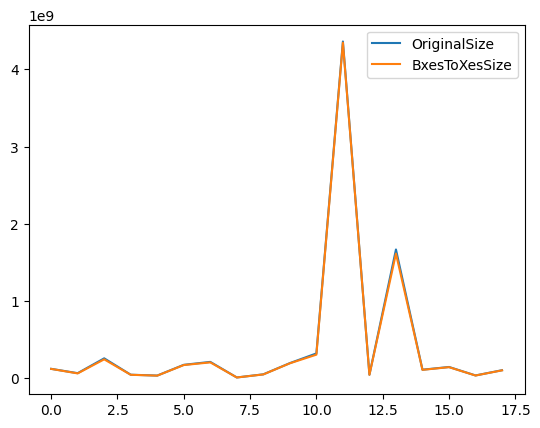

Exi-BxesPreprocessing TtestResult(statistic=-6.015817889066941, pvalue=1.389981018422384e-05, df=17)
Exi-Bxes TtestResult(statistic=-5.768078318251467, pvalue=2.2727237865656887e-05, df=17)
Bxes-BxesPreprocessing {TtestResult(statistic=-2.228247897410195, pvalue=0.03965369788720128, df=17)}
Bxes mean: 58.313308801354914
BxesPreprocessing mean: 59.12009825124824
Exi: 50.48498811534526


In [14]:
def one_repeat_procfiler_logs_predicate(row):
    return ('_75' in row['Name']) and 'BPI' not in row['Name']

test_hypothesis_filtered_df(df, one_repeat_procfiler_logs_predicate)